Epoch 1/20
112/112 [==============================] - 2s 4ms/step - loss: 9.1507e-04
Epoch 2/20
112/112 [==============================] - 0s 4ms/step - loss: 2.5304e-05
Epoch 3/20
112/112 [==============================] - 0s 4ms/step - loss: 2.3204e-05
Epoch 4/20
112/112 [==============================] - 0s 4ms/step - loss: 2.2703e-05
Epoch 5/20
112/112 [==============================] - 0s 4ms/step - loss: 2.3663e-05
Epoch 6/20
112/112 [==============================] - 0s 4ms/step - loss: 2.1803e-05
Epoch 7/20
112/112 [==============================] - 0s 4ms/step - loss: 2.2089e-05
Epoch 8/20
112/112 [==============================] - 0s 4ms/step - loss: 2.3660e-05
Epoch 9/20
112/112 [==============================] - 0s 4ms/step - loss: 2.0809e-05
Epoch 10/20
112/112 [==============================] - 0s 4ms/step - loss: 2.2111e-05
Epoch 11/20
112/112 [==============================] - 0s 4ms/step - loss: 2.1272e-05
Epoch 12/20
112/112 [==============================] - 0s 4ms/s

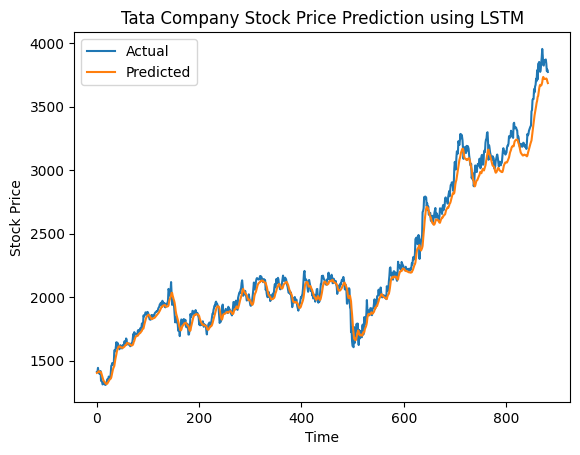

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

#Preprocess Data

df = pd.read_csv('TCS_stock_history.csv')
closing_prices = df['Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices = scaler.fit_transform(closing_prices.reshape(-1, 1))

train_size = int(0.8 * len(closing_prices))
train_data, test_data = closing_prices[:train_size], closing_prices[train_size:]

#Data Preparation

def create_lstm_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X_train, y_train = create_lstm_dataset(train_data, window_size)
X_test, y_test = create_lstm_dataset(test_data, window_size)

#LSTM Model

model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=32)

#Prediction

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

#Visualization

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Tata Company Stock Price Prediction using LSTM')
plt.show()
